In [58]:
import os
import copy
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm
import glob
import numpy as np
import tensorflow as tf
from skimage.io import imread, imsave
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn import svm
from PIL import Image
import random

In [14]:
src = '/Users/roryliao/Desktop/kvasir-dataset/Images'
train_dir = '/Users/roryliao/Desktop/kvasir-dataset/Train'
test_dir = '/Users/roryliao/Desktop/kvasir-dataset/Test'
train_padded_dir = '/Users/roryliao/Desktop/kvasir-dataset/Train_Padded'
test_padded_dir = '/Users/roryliao/Desktop/kvasir-dataset/Test_Padded'
test_size = 0.2

In [23]:
img_paths = glob.glob(os.path.join(src, '*/*.jpg'))
parent_names = [os.path.basename(os.path.abspath(os.path.join(p, os.pardir))) for p in img_paths]
labels = np.asarray([1 if p == 'dyed-lifted-polyps' else 0 if p == 'dyed-resection-margins' else 2 if p == 'esophagitis'
                    else 3 if p == 'normal-cecum' else 4 if p == 'normal-pylorus' else 5 if p == 'normal-z-line'
                    else 6 if p == 'polyps' else 7 for p in parent_names])
imgs = np.asarray([imread(p) for p in img_paths])
len(img_paths)

4000

In [144]:
x_train, x_test, y_train, y_test = train_test_split(imgs, labels, test_size = 0.2, random_state = 1)

In [145]:
y_test

array([2, 1, 6, 3, 1, 3, 5, 6, 1, 6, 2, 0, 1, 4, 1, 3, 2, 3, 1, 1, 1, 1,
       7, 6, 0, 2, 2, 5, 5, 1, 4, 6, 2, 4, 2, 1, 6, 6, 5, 5, 1, 0, 6, 4,
       0, 3, 0, 7, 4, 5, 5, 2, 6, 6, 2, 3, 6, 1, 5, 3, 6, 1, 6, 4, 3, 1,
       4, 4, 2, 0, 6, 1, 1, 6, 5, 0, 4, 1, 1, 2, 3, 2, 2, 5, 7, 4, 4, 2,
       6, 4, 2, 6, 5, 5, 0, 1, 0, 2, 7, 7, 0, 2, 2, 4, 6, 2, 7, 7, 5, 0,
       0, 7, 4, 3, 2, 4, 2, 4, 2, 7, 4, 7, 4, 4, 5, 4, 5, 2, 7, 0, 1, 4,
       5, 5, 5, 0, 6, 5, 5, 5, 5, 2, 7, 2, 1, 7, 5, 5, 4, 2, 5, 4, 7, 0,
       6, 2, 1, 2, 0, 4, 0, 3, 4, 6, 5, 6, 5, 3, 3, 4, 6, 5, 6, 2, 7, 4,
       6, 6, 4, 3, 2, 1, 5, 7, 6, 7, 6, 0, 6, 4, 1, 7, 0, 0, 2, 3, 3, 3,
       5, 2, 5, 0, 2, 2, 3, 2, 7, 6, 5, 0, 2, 0, 3, 7, 5, 5, 0, 1, 2, 5,
       4, 4, 0, 3, 5, 3, 5, 3, 0, 7, 5, 5, 3, 6, 5, 6, 5, 5, 5, 2, 3, 1,
       1, 0, 7, 4, 3, 0, 0, 7, 7, 7, 2, 0, 3, 7, 5, 7, 3, 4, 1, 5, 1, 0,
       4, 6, 6, 2, 5, 3, 6, 4, 5, 4, 2, 3, 3, 4, 4, 6, 3, 1, 7, 3, 0, 4,
       3, 6, 7, 2, 2, 1, 3, 3, 1, 7, 3, 7, 4, 1, 3,

In [86]:
#len(y_train)

In [ ]:
dyed_lifted_polyps_dir = os.path.join(train_padded_dir, 'dyed-lifted-polyps')
dyed_resection_margins_dir = os.path.join(train_padded_dir, 'dyed-resection-margins')
esophagitis_dir = os.path.join(train_padded_dir, 'esophagitis')
normal_cecum_dir = os.path.join(train_padded_dir, 'normal-cecum')
normal_pylorus_dir = os.path.join(train_padded_dir, 'normal-pylorus')
normal_z_line_dir = os.path.join(train_padded_dir, 'normal-z-line')
polyps_dir = os.path.join(train_padded_dir, 'polyps')
ulcerative_colitis_dir = os.path.join(train_padded_dir, 'ulcerative-colitis')

In [ ]:
os.makedirs(dyed_lifted_polyps_dir, exist_ok=True)
os.makedirs(dyed_resection_margins_dir, exist_ok=True)
os.makedirs(esophagitis_dir, exist_ok=True)
os.makedirs(normal_cecum_dir, exist_ok=True)
os.makedirs(normal_pylorus_dir, exist_ok=True)
os.makedirs(normal_z_line_dir, exist_ok=True)
os.makedirs(polyps_dir, exist_ok=True)
os.makedirs(ulcerative_colitis_dir, exist_ok=True)

In [ ]:
'''for i, (x, y) in enumerate(zip(x_train, y_train)):
    if y == 0:
        output_path = os.path.join(dyed_resection_margins_dir, f"{i:06d}.jpg")
    elif y == 1:
        output_path = os.path.join(dyed_lifted_polyps_dir, f"{i:06d}.jpg")
    elif y == 2:
        output_path = os.path.join(esophagitis_dir, f"{i:06d}.jpg")
    elif y == 3:
        output_path = os.path.join(normal_cecum_dir, f"{i:06d}.jpg")
    elif y == 4:
        output_path = os.path.join(normal_pylorus_dir, f"{i:06d}.jpg")
    elif y == 5:
        output_path = os.path.join(normal_z_line_dir, f"{i:06d}.jpg")
    elif y == 6:
        output_path = os.path.join(polyps_dir, f"{i:06d}.jpg")
    else:
        output_path = os.path.join(ulcerative_colitis_dir, f"{i:06d}.jpg")
    imsave(output_path, x)'''

In [150]:
dyed_lifted_polyps_dir = os.path.join(test_dir, 'dyed-lifted-polyps')
dyed_resection_margins_dir = os.path.join(test_dir, 'dyed-resection-margins')
esophagitis_dir = os.path.join(test_dir, 'esophagitis')
normal_cecum_dir = os.path.join(test_dir, 'normal-cecum')
normal_pylorus_dir = os.path.join(test_dir, 'normal-pylorus')
normal_z_line_dir = os.path.join(test_dir, 'normal-z-line')
polyps_dir = os.path.join(test_dir, 'polyps')
ulcerative_colitis_dir = os.path.join(test_dir, 'ulcerative-colitis')

In [151]:
os.makedirs(dyed_lifted_polyps_dir, exist_ok=True)
os.makedirs(dyed_resection_margins_dir, exist_ok=True)
os.makedirs(esophagitis_dir, exist_ok=True)
os.makedirs(normal_cecum_dir, exist_ok=True)
os.makedirs(normal_pylorus_dir, exist_ok=True)
os.makedirs(normal_z_line_dir, exist_ok=True)
os.makedirs(polyps_dir, exist_ok=True)
os.makedirs(ulcerative_colitis_dir, exist_ok=True)

In [152]:
'''for i, (x, y) in enumerate(zip(x_test, y_test)):
    if y == 0:
        output_path = os.path.join(dyed_resection_margins_dir, f"{i:06d}.jpg")
    elif y == 1:
        output_path = os.path.join(dyed_lifted_polyps_dir, f"{i:06d}.jpg")
    elif y == 2:
        output_path = os.path.join(esophagitis_dir, f"{i:06d}.jpg")
    elif y == 3:
        output_path = os.path.join(normal_cecum_dir, f"{i:06d}.jpg")
    elif y == 4:
        output_path = os.path.join(normal_pylorus_dir, f"{i:06d}.jpg")
    elif y == 5:
        output_path = os.path.join(normal_z_line_dir, f"{i:06d}.jpg")
    elif y == 6:
        output_path = os.path.join(polyps_dir, f"{i:06d}.jpg")
    else:
        output_path = os.path.join(ulcerative_colitis_dir, f"{i:06d}.jpg")
    imsave(output_path, x)'''

In [15]:
train_datagen = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True, vertical_flip = True, rescale=1/255, rotation_range = 90, validation_split = 0.1)
#Look up documentation. Look at creating new data using rotations
test_datagen = ImageDataGenerator(rescale=1/255)

In [16]:
train_gen = train_datagen.flow_from_directory(train_dir, batch_size = 2, seed = 42, subset = 'training', target_size = (256, 256))
val_gen = train_datagen.flow_from_directory(train_dir, batch_size = 2, seed = 42, subset = 'validation', target_size = (256, 256))
test_gen = test_datagen.flow_from_directory(test_dir, batch_size = 2, shuffle = False, target_size = (256, 256))

Found 2883 images belonging to 8 classes.
Found 317 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [9]:
train_gen.class_indices

{'dyed-lifted-polyps': 0,
 'dyed-resection-margins': 1,
 'esophagitis': 2,
 'normal-cecum': 3,
 'normal-pylorus': 4,
 'normal-z-line': 5,
 'polyps': 6,
 'ulcerative-colitis': 7}

In [ ]:
target_size = (1500, 1500)
#Look into rescaling the images
def pad_image(img, target_size):
    img_padded = np.zeros((*target_size, 3), dtype=img.dtype)
    center = np.asarray(img.shape[:2]) // 2
    center_padded = np.asarray(target_size) // 2
    start_padded = np.maximum(center_padded - center, np.zeros(2, np.int))
    stop_padded = np.minimum(start_padded + np.asarray(img.shape[:2]), np.asarray(target_size))
    start = np.maximum(np.zeros(2, np.int), center - center_padded)
    stop = np.minimum(np.asarray(img.shape[:2]), start + np.asarray(target_size))
    img_padded[start_padded[0]:stop_padded[0], start_padded[1]:stop_padded[1]] = img[start[0]:stop[0], start[1]:stop[1]]
    return img_padded

In [ ]:
padded_imgs = np.empty((len(img_paths), *target_size, 3), dtype=np.uint8)
'''for i, path in tqdm(enumerate(img_paths), total=len(img_paths)):
    img = imread(path)
    img_padded = pad_image(img, target_size)
    padded_imgs[i] = img_padded'''

In [ ]:
padded_imgs.shape

In [139]:
x,y = next(train_gen)
x.shape, y.shape

((2, 256, 256, 3), (2, 8))

In [43]:
pool_size = (4,4)
kernal_size = (1,1)

x_in = tf.keras.layers.Input(shape=(256, 256, 3))

x = tf.keras.layers.Conv2D(filters=16, kernel_size=kernal_size, activation='relu')(x_in)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=pool_size)(x)

x = tf.keras.layers.Conv2D(filters=32, kernel_size=kernal_size, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=pool_size)(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=kernal_size, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=pool_size)(x)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=kernal_size, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=pool_size)(x)

x_flatten = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x_flatten)

x_out = tf.keras.layers.Dense(8, activation='softmax')(x)

In [44]:
model = tf.keras.Model(x_in, x_out)
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 256, 256, 16)      64        
_________________________________________________________________
batch_normalization_51 (Batc (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 64, 64, 32)        544       
_________________________________________________________________
batch_normalization_52 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 16, 16, 32)        0  

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])

In [9]:
model.load_weights('/Users/roryliao/Desktop/kvasir-dataset/Weights.h5')

In [46]:
history = model.fit_generator(train_gen, steps_per_epoch=len(train_gen), epochs=200, validation_data=val_gen, validation_steps=len(val_gen))

Epoch 1/200
1442/1442 [==============================] - 147s 102ms/step - loss: 1.5831 - acc: 0.3656 - val_loss: 1.0588 - val_acc: 0.4921
Epoch 2/200
1442/1442 [==============================] - 149s 104ms/step - loss: 1.2153 - acc: 0.4842 - val_loss: 1.0429 - val_acc: 0.4984
Epoch 3/200
1442/1442 [==============================] - 144s 100ms/step - loss: 1.1187 - acc: 0.5036 - val_loss: 0.9229 - val_acc: 0.5552
Epoch 4/200
1442/1442 [==============================] - 141s 98ms/step - loss: 1.0343 - acc: 0.5265 - val_loss: 0.8327 - val_acc: 0.5868
Epoch 5/200
1442/1442 [==============================] - 142s 99ms/step - loss: 1.0400 - acc: 0.5193 - val_loss: 0.9208 - val_acc: 0.5552
Epoch 6/200
1442/1442 [==============================] - 147s 102ms/step - loss: 1.0079 - acc: 0.5335 - val_loss: 0.8609 - val_acc: 0.6025
Epoch 7/200
1442/1442 [==============================] - 151s 104ms/step - loss: 0.9429 - acc: 0.5595 - val_loss: 0.8138 - val_acc: 0.6057
Epoch 8/200
1442/1442 [======

Epoch 118/200
1442/1442 [==============================] - 123s 85ms/step - loss: 0.4102 - acc: 0.8259 - val_loss: 0.4794 - val_acc: 0.7886
Epoch 119/200
1442/1442 [==============================] - 123s 86ms/step - loss: 0.4083 - acc: 0.8300 - val_loss: 0.5075 - val_acc: 0.8013
Epoch 120/200
1442/1442 [==============================] - 123s 85ms/step - loss: 0.4183 - acc: 0.8293 - val_loss: 0.5301 - val_acc: 0.7981
Epoch 121/200
1442/1442 [==============================] - 123s 85ms/step - loss: 0.4097 - acc: 0.8221 - val_loss: 0.4778 - val_acc: 0.8013
Epoch 122/200
1442/1442 [==============================] - 123s 85ms/step - loss: 0.4336 - acc: 0.8255 - val_loss: 0.5083 - val_acc: 0.7697
Epoch 123/200
1442/1442 [==============================] - 123s 86ms/step - loss: 0.3986 - acc: 0.8342 - val_loss: 0.4180 - val_acc: 0.8423
Epoch 124/200
1442/1442 [==============================] - 123s 85ms/step - loss: 0.4220 - acc: 0.8217 - val_loss: 0.4920 - val_acc: 0.8107
Epoch 125/200
1442/1

In [22]:
model.save_weights('/Users/roryliao/Desktop/kvasir-dataset/Weights4Layers.h5')

In [48]:
scores = model.predict(test_gen, verbose = 1)

400/400 [==============================] - 10s 26ms/step


In [55]:
model.evaluate(test_gen, verbose = 1)

400/400 [==============================] - 11s 27ms/step - loss: 0.7752 - acc: 0.7800


[0.7752273702963521, 0.78]

In [49]:
preds = np.argmax(scores, axis = 1)

In [180]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 1, 7, 6, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       7, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 7, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 5, 2, 2, 2, 2, 2,
       2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,

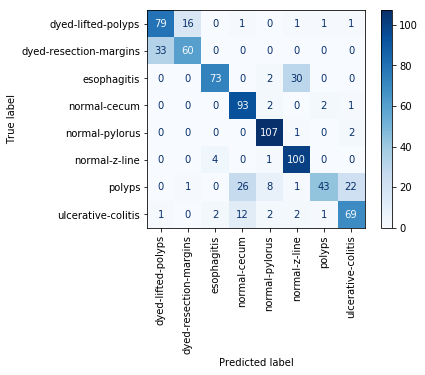

In [56]:
matrix = confusion_matrix(test_gen.classes, preds)

disp = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = train_gen.class_indices)

disp = disp.plot(cmap = plt.cm.Blues)

plt.xticks(rotation = 90)

plt.show()

In [57]:
print(matrix)

[[ 79  16   0   1   0   1   1   1]
 [ 33  60   0   0   0   0   0   0]
 [  0   0  73   0   2  30   0   0]
 [  0   0   0  93   2   0   2   1]
 [  0   0   0   0 107   1   0   2]
 [  0   0   4   0   1 100   0   0]
 [  0   1   0  26   8   1  43  22]
 [  1   0   2  12   2   2   1  69]]


In [53]:
#Horizontal Line at Chance
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[0].set(xlim=(0, 200), ylim=(0, 2))
    ax[0].set_xlabel('Epochs')
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[1].set(xlim=(0, 200), ylim=(0, 1))
    ax[1].set_xlabel('Epochs')
    ax[0].legend()
    ax[1].legend()

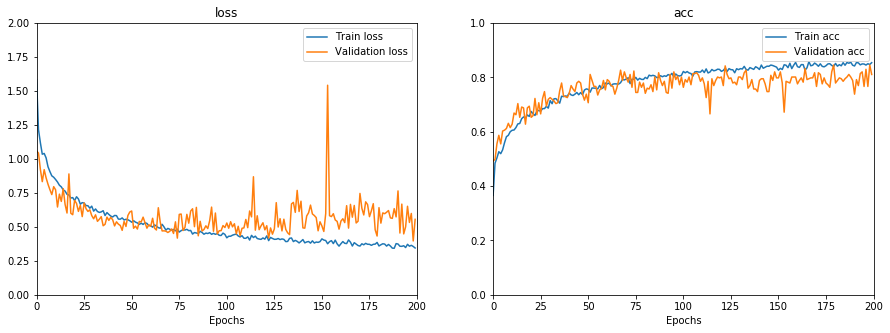

In [54]:
show_final_history(history)